# Script de modélisation

## Prise en compte des données

In [1]:
import pandas as pd
import numpy as np
import panel as pn

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('result_requetes.csv')
data.head()

,order_requests,nb_requete,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,1,1,859,134,58,valletta,30,portuguese,0,65736,Independant,Independant,0,0,0
1,1,1,719,155,97,valletta,30,portuguese,0,65736,Yin Yang,Royal Lotus,0,0,0
2,1,1,160,94,21,valletta,30,portuguese,0,65736,Independant,Independant,1,0,0
3,1,1,504,158,74,valletta,30,portuguese,0,65736,Morriott International,Morriot,0,0,0
4,1,1,295,73,21,valletta,30,portuguese,0,65736,Yin Yang,8 Premium,0,0,0


In [2]:
len(data)

48586

In [3]:
data.dtypes

order_requests      int64
nb_requete          int64
hotel_id            int64
price               int64
stock               int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [4]:
#On affecte le bon type aux variables qualitatives
data["city"]=pd.Categorical(data["city"],ordered=False)
data["language"]=pd.Categorical(data["language"],ordered=False)
data["group"]=pd.Categorical(data["group"],ordered=False)
data["brand"]=pd.Categorical(data["brand"],ordered=False)

data["mobile"]=pd.Categorical(data["mobile"],ordered=False)
data["parking"]=pd.Categorical(data["parking"],ordered=False)
data["pool"]=pd.Categorical(data["pool"],ordered=False)
data["children_policy"]=pd.Categorical(data["children_policy"],ordered=False)

data["hotel_id"]=pd.Categorical(data["hotel_id"],ordered=False)
data["avatar_id"]=pd.Categorical(data["avatar_id"],ordered=False)

data["price"]=pd.DataFrame(data["price"], dtype=float)

data.dtypes
#data.head()

order_requests        int64
nb_requete            int64
hotel_id           category
price               float64
stock                 int64
city               category
date                  int64
language           category
mobile             category
avatar_id          category
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

## Analyse de données

In [5]:
data.describe() #Indicateurs statistiques 1D pour les variables quantitatives

,order_requests,nb_requete,price,stock,date
count,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000
mean,226.578912,1.642057,158.723892,33.369716,17.830568
std,128.949766,0.901190,81.842505,48.052732,12.694925
min,1.000000,1.000000,40.000000,0.000000,0.000000
25%,117.000000,1.000000,96.000000,2.000000,7.000000
50%,227.000000,1.000000,141.000000,14.000000,15.000000
75%,335.000000,2.000000,196.000000,44.000000,27.000000
max,450.000000,7.000000,522.000000,284.000000,44.000000


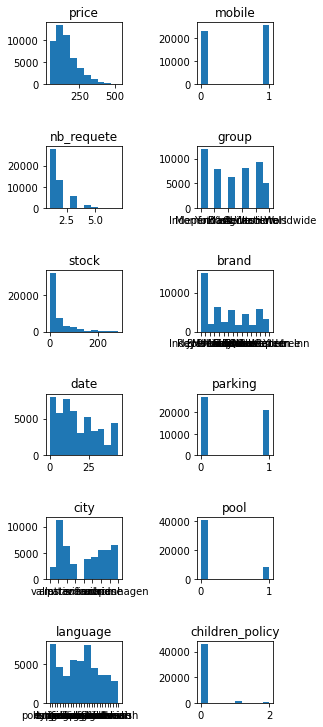

In [6]:
# Tracé des histogrammes
cm = 1/2.54
fig, ax = plt.subplots(6,2,figsize=(10*cm, 30*cm))
ax[0,0].hist(data["price"])
ax[0,0].set_title('price')
ax[1,0].hist(data["nb_requete"])
ax[1,0].set_title('nb_requete')
ax[2,0].hist(data["stock"])
ax[2,0].set_title('stock')
ax[3,0].hist(data["date"])
ax[3,0].set_title('date')
ax[4,0].hist(data["city"])
ax[4,0].set_title('city')
ax[5,0].hist(data["language"])
ax[5,0].set_title('language')
ax[0,1].hist(data["mobile"])
ax[0,1].set_title('mobile')
ax[1,1].hist(data["group"])
ax[1,1].set_title('group')
ax[2,1].hist(data["brand"])
ax[2,1].set_title('brand')
ax[3,1].hist(data["parking"])
ax[3,1].set_title('parking')
ax[4,1].hist(data["pool"])
ax[4,1].set_title('pool')
ax[5,1].hist(data["children_policy"])
ax[5,1].set_title('children_policy')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.show()

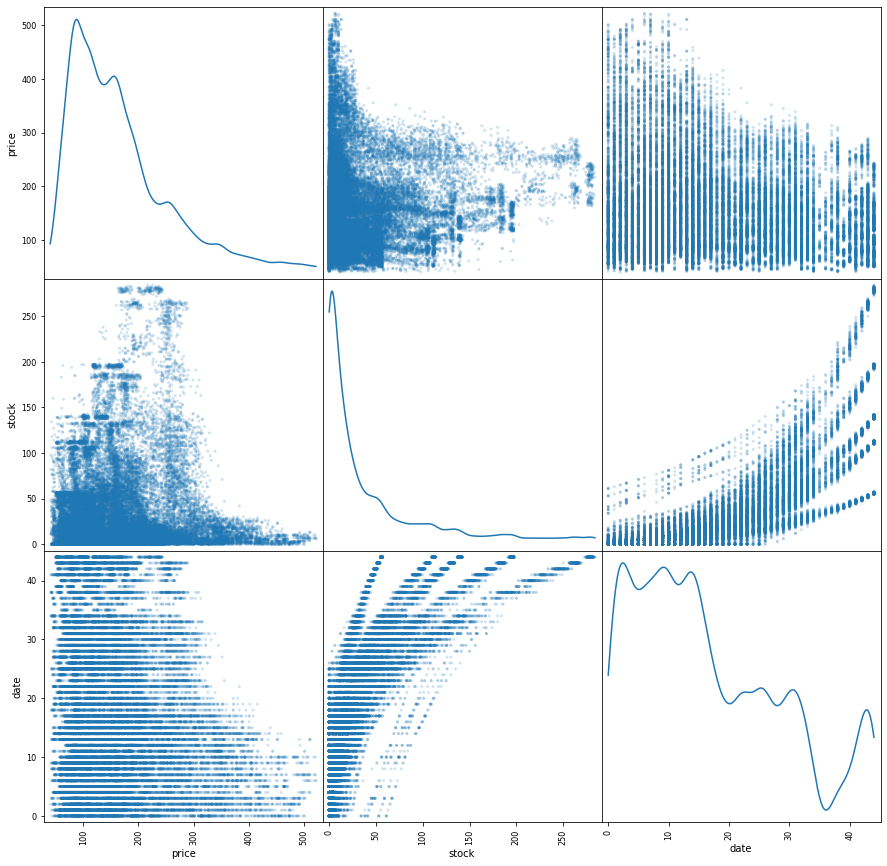

In [7]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(data[["price","stock","date"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

### Observations :

Ligne 1 :

prix en fonction du stock : prix + élevé quand stock tout petit. Passé un stock de 50 chambres dispo, peu de variation du prix. corrélation = 0.2 environ

prix en fonction de la date : prix + élevé quand date + petite. Passé 20 jours, peu de variation du prix. corrélation = -0.2 environ

Ligne 2 :

stock en fonction de la date : stock augmente avec la date. corrélation = 0.8 environ

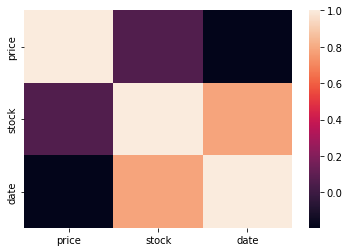

In [8]:
correlation_mat = data[["price","stock","date"]].corr()

import seaborn as sns
sns.heatmap(correlation_mat, annot = False)

plt.show()

### Analyse à ajouter pour déterminer les features les + importantes, etc...

Analyse factorielle discriminante ?

## Extraction des échantillons d'apprentissage et de validation

In [9]:
data.head()

,order_requests,nb_requete,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,1,1,859,134.0,58,valletta,30,portuguese,0,65736,Independant,Independant,0,0,0
1,1,1,719,155.0,97,valletta,30,portuguese,0,65736,Yin Yang,Royal Lotus,0,0,0
2,1,1,160,94.0,21,valletta,30,portuguese,0,65736,Independant,Independant,1,0,0
3,1,1,504,158.0,74,valletta,30,portuguese,0,65736,Morriott International,Morriot,0,0,0
4,1,1,295,73.0,21,valletta,30,portuguese,0,65736,Yin Yang,8 Premium,0,0,0


### Xtrain avec conversion des variables catégorielles en dummy/indicator variables

Utilisation de OneHotEncoder au lieu de pd.get_dummies

In [10]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
#Xr_val = scaler.transform(X_val)

In [11]:
from sklearn.preprocessing import OneHotEncoder
X=data[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
enc = OneHotEncoder()
enc.fit(X)
enc.categories_

[array(['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia',
        'valletta', 'vienna', 'vilnius'], dtype=object),
 array(['austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech',
        'danish', 'dutch', 'estonian', 'finnish', 'french', 'german',
        'greek', 'hungarian', 'irish', 'italian', 'latvian', 'lithuanian',
        'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian',
        'slovakian', 'slovene', 'spanish', 'swedish'], dtype=object),
 array([0, 1]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  8

In [12]:
Xenc=enc.transform(X).toarray()
Xenc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
dataDum=pd.DataFrame(Xenc)
dataDum

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48581,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
48582,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
48583,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
48584,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
dataQuant = data[["stock","date"]]
#dataDum = pd.get_dummies(data[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]])
dfC = pd.concat([dataQuant,dataDum],axis=1)
dfC.head()

,stock,date,0,1,2,3,4,5,6,7,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,58,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,97,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,21,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,74,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,21,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
Y = data[["price"]]
Y.head()

,price
0,134.0
1,155.0
2,94.0
3,158.0
4,73.0


In [16]:
#len(Xtrain)
dfC.shape

(48586, 1068)

In [17]:
len(Y)

48586

In [18]:
from sklearn.model_selection import train_test_split  
#test_size = échantillon test de taille ... parmi les ... observations (20 %)
longueur = int(0.2*len(Y))
X_train,X_val,Y_train,Y_val=train_test_split(dfC,Y,test_size=longueur,random_state=11)

In [19]:
print(X_train.shape,len(Y_train))

(38869, 1068) 38869


In [20]:
X_train

,stock,date,0,1,2,3,4,5,6,7,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
33194,23,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
40703,14,15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
24747,11,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
15188,16,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
36169,44,27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32081,0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7259,168,31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
21584,31,26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
36543,11,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [21]:
Ytrain = np.ravel(Y_train)
Ytrain

array([174., 203., 199., ..., 121.,  72., 159.])

### Standardisation des données?
Inutile pour RandomForest / utile pour XGBoost?

Si oui à faire sur l'échantillon test du Defi

In [22]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
#Xr_val = scaler.transform(X_val)

## Modélisation avec une forêt aléatoire

In [23]:
#help(RandomForestRegressor)
#help(forest.fit)

Premier modèle avec 100 arbres dans la forêt et 2 variables tirées aléatoirement lors de la construction de chq noeud.

In [24]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=100, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,Ytrain)
print(rfFit.oob_score_) #proportion de bonnes prédictions avec l'échantillon train

0.9938444437732795


MSE et R2 score sur l'échantillon de validation :

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
prev=rfFit.predict(X_val)
print("MSE=",mean_squared_error(Y_val,prev))
print("R2=",r2_score(Y_val,prev))

MSE= 42.63118384563526
R2= 0.9937526102550234


Comparaison graphique entre prix prédit par le modèle et prix exact

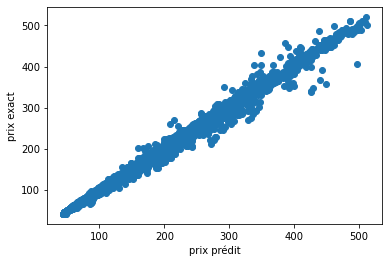

In [26]:
plt.plot(prev,Y_val,"o")
plt.xlabel(u"prix prédit")
plt.ylabel(u"prix exact")
plt.show()

Graphique des résidus entre prix prédit par le modèle et prix exact

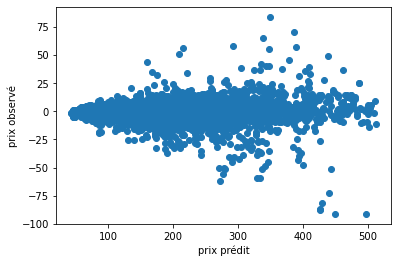

In [27]:
plt.plot(prev,np.ravel(Y_val) - prev,"o")
plt.xlabel(u"prix prédit")
plt.ylabel(u"prix observé")
#plt.hlines(0,0,500)
plt.show()

Indices d'importance - impossible à interpréter ici

In [28]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(X_train, Ytrain)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

1057 0.06405036753414632
stock 0.05898718448905096
1061 0.052235310282102654
date 0.04903388721500632
1047 0.04169989343875146
1040 0.04057724445540857
1062 0.03857063173933962
1050 0.03694403407433561
1046 0.03022355393386354
1041 0.02707755246589131
1049 0.01943896889196709
1039 0.019105096275855726
1043 0.01709707052402577
1037 0.016387195769650136
8 0.015424186970923535
5 0.01353035270062968
1 0.013240464361281677
3 0.013010658804190327
1056 0.009420432340358798
1052 0.008839524955978258
1038 0.007654546691307707
1065 0.0072997551222284025
1042 0.006987850020324363
1054 0.006440663518664163
1063 0.006439846087905627
1053 0.005484429148394932
1055 0.0053053860324685734
1045 0.0051603578922749735
2 0.004305565874215135
1058 0.003664799313258794
1060 0.003637387181291617
846 0.0035864960591453017
1048 0.0035349448318990322
1059 0.0034668913880469077
0 0.0034655493881456073
622 0.0033607932240132758
4 0.0032927509445678186
36 0.003149981497467385
133 0.003143919988530482
37 0.003083428

250 0.00013428550548575535
414 0.00013392034649063958
269 0.0001334338670977183
964 0.00013324276164211613
427 0.00013188408497160365
725 0.0001314148660014573
704 0.00013138638961035685
312 0.0001310233540531424
263 0.0001302577796890434
977 0.00013025315220973238
694 0.0001296096148222919
543 0.00012935445044159346
454 0.00012933973951642468
201 0.00012887384513946573
339 0.00012856110368926138
227 0.00012832728873646198
695 0.00012815107468534335
330 0.0001276124009609599
969 0.00012718983900378509
300 0.00012689735658222433
341 0.00012686929695210244
677 0.0001263941465403565
965 0.00012554607199450173
85 0.0001255035781536026
814 0.00012542798464148023
1032 0.00012529917436977567
805 0.00012509680461083615
773 0.00012488309759397934
981 0.000124843180309498
1012 0.00012477096791383126
212 0.00012467884099176204
233 0.0001246707276314666
1018 0.00012384684631378405
210 0.00012372288218097139
184 0.0001232018176591733
926 0.00012268737045468368
915 0.00012168414590975518
141 0.00012

In [29]:
# Graphe des importances
#plt.figure()
#plt.title("Importances des variables")
#plt.bar(range(X_train.shape[1]), importances[indices])
#plt.xticks(range(X_train.shape[1]), indices)
#plt.xlim([-1, X_train.shape[1]])
#plt.show()

Optimisation par validation croisée du nombre d'arbres dans la forêts et du nombre de variables tirées aléatoirement lors de la construction de chaque noeud. RESULTAT MOINS BON ?!

In [30]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#param=[{"n_estimators":list(range(100,400,100)),"max_features":list(range(2,5,1))}]
#rf= GridSearchCV(RandomForestRegressor(),
#        param,cv=10,n_jobs=-1)
#rfOpt=rf.fit(X_train, Ytrain)
#print("Meilleur score = %f, Meilleur paramètre = %s" % (rfOpt.best_score_,rfOpt.best_params_))

In [31]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#prev2=rfOpt.predict(X_val)
#print("MSE=",mean_squared_error(Y_val,prev))
#print("R2=",r2_score(Y_val,prev))

In [32]:
prev0=np.around(prev, decimals=1)
prev0

array([323.6, 102.6,  71.2, ...,  75.6, 105.5,  64.3])

In [33]:
len(prev0)
indice0 = pd.DataFrame(np.arange(0,len(prev0)),columns = ['index'])
indice0

,index
0,0
1,1
2,2
3,3
4,4
...,...
9712,9712
9713,9713
9714,9714
9715,9715


In [34]:
price0=pd.DataFrame(prev0,columns = ['price'])
price0

,price
0,323.6
1,102.6
2,71.2
3,150.0
4,278.6
...,...
9712,89.7
9713,123.5
9714,75.6
9715,105.5


In [35]:
sub0=indice0.join(price0, on=None, how='right', lsuffix='', rsuffix='', sort=False)
sub0

,index,price
0,0,323.6
1,1,102.6
2,2,71.2
3,3,150.0
4,4,278.6
...,...,...
9712,9712,89.7
9713,9713,123.5
9714,9714,75.6
9715,9715,105.5


In [36]:
sub0.to_csv('./Y_val.csv', index= False)

## Modélisation avec une SVM

Optimisation par validation croisée -> TROP COUTEUX

In [37]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVR
#param=[{"C":[0.4,0.7,1],"gamma":[.03,.04,.05]}]
#svm= GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
#svmOpt=svm.fit(X_train,Ytrain)
# paramètre optimal
#print("Meilleur R2 = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))

In [38]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#prevSVM=svmOpt.predict(X_val)
#print("MSE=",mean_squared_error(Y_val,prevSVM))
#print("R2=",r2_score(Y_val,prevSVM))

## Prédiction sur les données test (à mettre dans un autre fichier qd on passera en .py)

In [39]:
import pandas as pd
import numpy as np
import panel as pn

%matplotlib inline
import matplotlib.pyplot as plt

test = pd.read_csv('./defi-ia-2023/test_set.csv')
test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [40]:
hotels = pd.read_csv('./defi-ia-2023/features_hotels.csv', index_col=['hotel_id', 'city'])
test = test.join(hotels, on=['hotel_id', 'city'])
test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [41]:
len(test)

6644

In [42]:
test.dtypes

index               int64
order_requests      int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
hotel_id            int64
stock               int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [43]:
#On affecte le bon type aux variables qualitatives
test["city"]=pd.Categorical(test["city"],ordered=False)
test["language"]=pd.Categorical(test["language"],ordered=False)
test["group"]=pd.Categorical(test["group"],ordered=False)
test["brand"]=pd.Categorical(test["brand"],ordered=False)

test["mobile"]=pd.Categorical(test["mobile"],ordered=False)
test["parking"]=pd.Categorical(test["parking"],ordered=False)
test["pool"]=pd.Categorical(test["pool"],ordered=False)
test["children_policy"]=pd.Categorical(test["children_policy"],ordered=False)

test["hotel_id"]=pd.Categorical(test["hotel_id"],ordered=False)
test["avatar_id"]=pd.Categorical(test["avatar_id"],ordered=False)

#test["price"]=pd.DataFrame(test["price"], dtype=float)

test.dtypes
#test.head()

index                 int64
order_requests        int64
city               category
date                  int64
language           category
mobile             category
avatar_id          category
hotel_id           category
stock                 int64
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

In [44]:
T=test[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
Tenc=enc.transform(T).toarray()
Tenc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [45]:
testDum=pd.DataFrame(Tenc)
testDum

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [46]:
testQuant = test[["stock","date"]]
#testDum = pd.get_dummies(test[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]])
Xtest = pd.concat([testQuant,testDum],axis=1)
Xtest.head()

,stock,date,0,1,2,3,4,5,6,7,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,46,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,32,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,12,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,10,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,42,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [47]:
Xtest.shape

(6644, 1068)

In [48]:
Yprev=rfFit.predict(Xtest)

In [49]:
Yprev0=np.around(Yprev, decimals=1)
Yprev0

array([121.4, 163.7,  66. , ..., 140.9, 172.1, 139.2])

In [50]:
len(Yprev0)
Yindice = pd.DataFrame(np.arange(0,len(Yprev0)),columns = ['index'])
Yindice

,index
0,0
1,1
2,2
3,3
4,4
...,...
6639,6639
6640,6640
6641,6641
6642,6642


In [51]:
Yprice=pd.DataFrame(Yprev0,columns = ['price'])
Yprice

,price
0,121.4
1,163.7
2,66.0
3,71.4
4,185.6
...,...
6639,100.9
6640,184.2
6641,140.9
6642,172.1


In [52]:
Ysub=Yindice.join(Yprice, on=None, how='right', lsuffix='', rsuffix='', sort=False)
Ysub

,index,price
0,0,121.4
1,1,163.7
2,2,66.0
3,3,71.4
4,4,185.6
...,...,...
6639,6639,100.9
6640,6640,184.2
6641,6641,140.9
6642,6642,172.1


In [53]:
Ysub.to_csv('./sample_submission1.csv', index= False)

In [54]:
len(Ysub)

6644